## Testing Flair NER model for German

In [1]:
# !pip install flair ipywidgets spacy

In [2]:
# !python -m spacy download de_core_news_sm

In [3]:
from flair.data import Sentence
from flair.models import SequenceTagger

/home/klychliiev/Desktop/Meduzzen_AI_Internship/emails/flair_model_training/flair_classification/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/klychliiev/Desktop/Meduzzen_AI_Internship/emails/flair_model_training/flair_classification/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/klychliiev/Desktop/Meduzzen_AI_Internship/emails/flair_model_training/flair_classification/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarn

In [4]:
tagger = SequenceTagger.load("flair/ner-german-large")

In [5]:
sentence = Sentence("Die schnelle Niederlage Frankreichs kam für die meisten Menschen unerwartet, nicht zuletzt für Josef Stalin.")

In [6]:
tagger.predict(sentence)

In [7]:
print(sentence)

Sentence[17]: "Die schnelle Niederlage Frankreichs kam für die meisten Menschen unerwartet, nicht zuletzt für Josef Stalin." → ["Frankreichs"/LOC, "Josef Stalin"/PER]


In [8]:
# print predicted NER spans
print('The following NER tags are found:')
# iterate over entities and print
for entity in sentence.get_spans('ner'):
    print(entity)

The following NER tags are found:
Span[3:4]: "Frankreichs" → LOC (1.0)
Span[14:16]: "Josef Stalin" → PER (1.0)


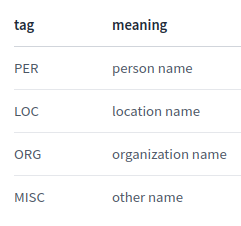

<br>
4 NER tags available. F1-Score for the model = 92.31

## Preprocess data

In [3]:
import pandas as pd
# from text_cleaning import fetch_body, preprocess_text

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# cd drive/MyDrive/emails

In [6]:
df = pd.read_csv('full_dataset.csv')

In [7]:
df.head()

,Unnamed: 0,Category,Content
0,0,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
1,1,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
2,2,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
3,3,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
4,4,UPGRADE_ERSATZ_GUTSCHRIFT,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...


In [8]:
# delete unnecessary columns
df = df.drop(['Unnamed: 0'], axis=1)

In [9]:
df.head()

,Category,Content
0,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
1,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
2,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
3,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
4,UPGRADE_ERSATZ_GUTSCHRIFT,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...


In [10]:
# example of correctly decoded email
print(df['Content'][0])

An:	KUNDENSERVICE@EPLUS
Kopie:	 
Datum:	18.09.2001 11:25:33
Betreff:	E-Mail Beantwortung

	  



Anrede         : Herr
Name           : Klaus-Peter Böhm
Handyrufnummer : 49 177 7549010
Account Nummer :
Handymodell    :
Provider       : E-Plus Service
Email          : kbhm@aol.com
-------------------------------------
Nachricht      : Da man bei der Kunden-hotline eh nur zu allgemeinen 
Dingen Auskunft erhält und seltene auf einen kompetenten Ansprechpartner 
trifft muß ich mich heute auf diesem Wege an Sie wenden.
Mit heutigem Eingang meiner Rechnung musste ich wieder einmal feststellen 
, dass ihrerseits die Grundgebühren voll berechnet wurden , obwohl wie 
Ihnen bekannt das Netz auch im vergangenen Monat an mehreren Tagen 
größtenteils überhaupt nicht zur Verfügung stand. Bei der hotline bekommt 
man dann die lapidare Auskunft mal solle weiter versuchen sich 
einzubuchen. Kein Wort der Entschuldigung für die Nicht- Verfügbarkeit. 
Ist es normal zu kasssieren für eine Leistung, die ma

In [11]:
# example of incorrectly decoded email
print(df['Content'][1])

An:	KUNDENSERVICE@EPLUS
Kopie:	 
Datum:	31.01.2001 19:25:10
Betreff:	E-Mail Beantwortung  [Virus checked]

	  


--497903949.980965510193.JavaMail.nsuser@app03mn1
Content-Transfer-Encoding: quoted-printable
Content-Type: text/plain; charset=ISO-8859-1

Anrede         : Herr
Name           : G=FCnther Zimmermann
Handyrufnummer : 49 177 2403354
Account Nummer :=20
Handymodell    : Nokia 3210
Provider       : E-Plus Service
Email          : Guenther.Zimmermann@t-online.de
-------------------------------------
Nachricht      : Sehr geehrte Damen und Herren,

ich habe Ihnen am 28.01.2001 das nachfolgende Schreiben per Fax 
=FCbermitte=
lt, bisher jedoch keine Antwort erhalten. Das bin ich garnicht gewohnt, da 
=
Sie sonst sehr z=FCgig arbeiten. Woran liegt es diesmal?

MfG
G=FCnther Zimmermann

FAX vom 28.01.2001:

E-Plus Service GmbH
Postfach

14425 Potsdam=09=09=09=09=09=09Fax: 0331-7002330




E-Plus Service Rufnummer:=09=09491772403354
E-Plus Service Kundennummer:=09=091893227


Sehr ge

In [12]:
import quopri

encoded_text = df['Content'][1]
decoded_text = quopri.decodestring(encoded_text).decode('iso-8859-1')

print(decoded_text)

An:	KUNDENSERVICE@EPLUS
Kopie:	 
Datum:	31.01.2001 19:25:10
Betreff:	E-Mail Beantwortung  [Virus checked]

	  


--497903949.980965510193.JavaMail.nsuser@app03mn1
Content-Transfer-Encoding: quoted-printable
Content-Type: text/plain; charset=ISO-8859-1

Anrede         : Herr
Name           : Günther Zimmermann
Handyrufnummer : 49 177 2403354
Account Nummer : 
Handymodell    : Nokia 3210
Provider       : E-Plus Service
Email          : Guenther.Zimmermann@t-online.de
-------------------------------------
Nachricht      : Sehr geehrte Damen und Herren,

ich habe Ihnen am 28.01.2001 das nachfolgende Schreiben per Fax 
übermittelt, bisher jedoch keine Antwort erhalten. Das bin ich garnicht gewohnt, da 
Sie sonst sehr zügig arbeiten. Woran liegt es diesmal?

MfG
Günther Zimmermann

FAX vom 28.01.2001:

E-Plus Service GmbH
Postfach

14425 Potsdam						Fax: 0331-7002330




E-Plus Service Rufnummer:		491772403354
E-Plus Service Kundennummer:		1893227


Sehr geehrtes E-Plus Service Team,

anbei

In [13]:
df.shape

(2448, 2)

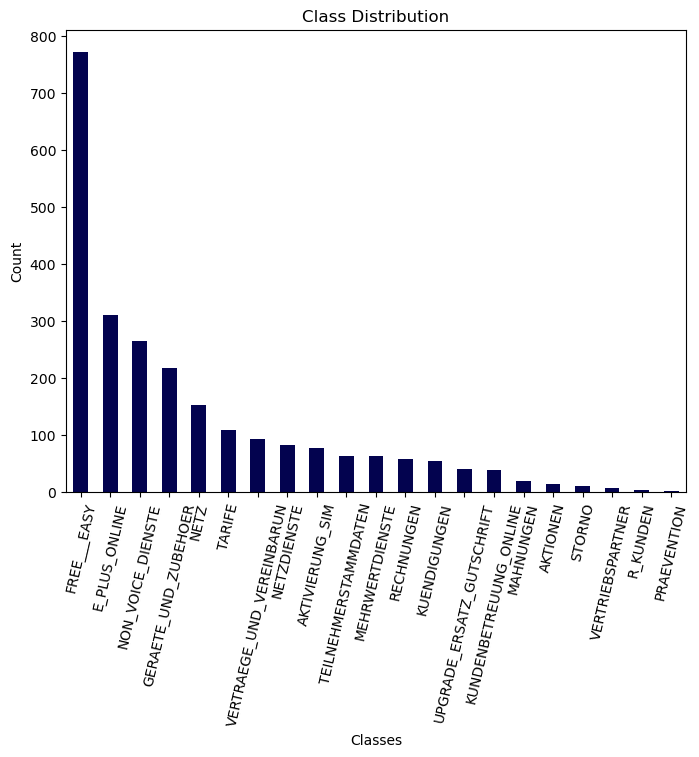

In [14]:
# class distribution

import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['Category'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=(0.01,0.01,0.31))
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=77)  # Rotate x-axis labels if needed
plt.show()

In [15]:
df['Category'].value_counts()

Category
FREE___EASY                  772
E_PLUS_ONLINE                311
NON_VOICE_DIENSTE            264
GERAETE_UND_ZUBEHOER         218
NETZ                         152
TARIFE                       109
VERTRAEGE_UND_VEREINBARUN     92
NETZDIENSTE                   82
AKTIVIERUNG_SIM               77
TEILNEHMERSTAMMDATEN          63
MEHRWERTDIENSTE               63
RECHNUNGEN                    57
KUENDIGUNGEN                  54
UPGRADE_ERSATZ_GUTSCHRIFT     40
KUNDENBETREUUNG_ONLINE        39
MAHNUNGEN                     19
AKTIONEN                      14
STORNO                        11
VERTRIEBSPARTNER               6
R_KUNDEN                       4
PRAEVENTION                    1
Name: count, dtype: int64

Here, we deal with the data imbalance. The biggest class has 772 records, while the smallest - PRAEVENTION - has only 1 record. We can use ovesampling to eliminate this problem.

## Fix the encoding of the emails

In [16]:
def decode_quoted_printable(text):
    if isinstance(text, str):
        try:
            # Convert string to bytes, decode using quopri, and then decode to iso-8859-1
            decoded = quopri.decodestring(text.encode('latin1')).decode('iso-8859-1')
            return decoded
        except Exception as e:
            return str(e)
    return text

df['Content_fixed'] = df['Content'].apply(decode_quoted_printable)


## Duplicate the category with only one example

We need to duplicate categories with only one example because sklearn doesn't allow train/test splitting unless there is a minimum of 2 entries per category. The category with only onw example in the dataset is 'PRAEVENTION'

In [17]:
# Duplicating rows where 'Category' is 'PRAEVENTION'
condition = df['Category'] == 'PRAEVENTION'
rows_to_duplicate = df[condition]

# Duplicate the rows
duplicated_rows = rows_to_duplicate.copy()

# Append duplicated rows to the original DataFrame
df = pd.concat([df, duplicated_rows], ignore_index=True)

In [18]:
df['Category'].value_counts()

Category
FREE___EASY                  772
E_PLUS_ONLINE                311
NON_VOICE_DIENSTE            264
GERAETE_UND_ZUBEHOER         218
NETZ                         152
TARIFE                       109
VERTRAEGE_UND_VEREINBARUN     92
NETZDIENSTE                   82
AKTIVIERUNG_SIM               77
TEILNEHMERSTAMMDATEN          63
MEHRWERTDIENSTE               63
RECHNUNGEN                    57
KUENDIGUNGEN                  54
UPGRADE_ERSATZ_GUTSCHRIFT     40
KUNDENBETREUUNG_ONLINE        39
MAHNUNGEN                     19
AKTIONEN                      14
STORNO                        11
VERTRIEBSPARTNER               6
R_KUNDEN                       4
PRAEVENTION                    2
Name: count, dtype: int64

## Email cleaning

In [ ]:
from text_cleaning import fetch_body, preprocess_text

In [33]:
df.isna().any()

Category         False
Content          False
Content_fixed    False
dtype: bool

In [34]:
df = df.dropna()

In [35]:
df['Email_body'] = df['Content_fixed'].apply(fetch_body)

In [21]:
df

,Category,Content,Content_fixed
0,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
1,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
2,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
3,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
4,UPGRADE_ERSATZ_GUTSCHRIFT,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
...,...,...,...
2444,NETZDIENSTE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
2445,NETZDIENSTE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
2446,NETZDIENSTE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
2447,NETZDIENSTE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...


In [36]:
df['Email_body'][0]

'Da man bei der Kunden-hotline eh nur zu allgemeinen Dingen Auskunft erhält und seltene auf einen kompetenten Ansprechpartner trifft muß ich mich heute auf diesem Wege an Sie wenden. Mit heutigem Eingang meiner Rechnung musste ich wieder einmal feststellen, dass ihrerseits die Grundgebühren voll berechnet wurden, obwohl wie Ihnen bekannt das Netz auch im vergangenen Monat an mehreren Tagen größtenteils überhaupt nicht zur Verfügung stand. Bei der hotline bekommt man dann die lapidare Auskunft mal solle weiter versuchen sich einzubuchen. Kein Wort der Entschuldigung für die Nicht- Verfügbarkeit. Ist es normal zu kasssieren für eine Leistung, die man nicht erbracht hat?Ist es normal die Kunden von seiten der Geschäftsleitung anzuschreiben und einen besseren Service für die Bestandskunden anzukündigen, aber genau das Gegenteil passiert? mit noch freundlichen Grüßen'

In [32]:
print(df['Content'][44])

An:	KUNDENSERVICE@EPLUS
Kopie:	 
Datum:	06.06.2001 08:46:53
Betreff:	E-Mail Beantwortung

	  



Anrede         : Frau
Name           : Sim Karte Gesperrt Thielsch Kai
Handyrufnummer : 49 178 8820181
Account Nummer :
Handymodell    : 6150
Provider       : E-Plus Service
Email          : kaithielsch@gmx.de
-------------------------------------
Nachricht      : Liebes e plus Team
Ich habe aus versehen meinen Pin und den darauffolgenden "puk" falsch 
eingegeben
Nun ist meine sim karte gesperrt
Wie kann ich einen neuen Pin bekommen damit mein handy wieder 
einsatzbereit ist??

Vielen dank im vorraus
Mit freundlichen grüßen
Kai Thielsch
-------------------------------------
--444043493.991813613145.JavaMail.nsuser@apps3mn1--




In [37]:
df['Email_body'][44]

'Liebes e plus Team Ich habe aus versehen meinen Pin und den darauffolgenden "puk" falsch eingegeben Nun ist meine sim karte gesperrt Wie kann ich einen neuen Pin bekommen damit mein handy wieder einsatzbereit ist?? Vielen dank im vorraus Mit freundlichen grüßen Kai Thielsch'

In [112]:
df['Processed_texts'] = df['Email_body'].apply(preprocess_text)

In [113]:
df['Processed_texts'][1]

'geehrt dam herr 28.01.2001 nachfolgend schreiben per fax übermitteln antwort erhalten garnicht wohnen zügig arbeiten woran liegen diesmal mfg günth zimmermann fax 28.01.2001 e-plus service gmbh postfach 14425 potsdam fax 0331 7002330 e-plus service rufnummer 491772403354 e-plus service kundennummer 1893227 geehrt e-plus service team anbei übersenden angebot geschäftsstelle berlin mitarbeiter öffentlich dienst bitte kurzfristig schriftlich mitteilen bestandskunden öffentlich dienst tim & more 60 tarif pauschalpreis 26,25 dm anbieten vertragsverlängerung günstig neu handy nokia 6210 enthalten hierbei rufnummer ändern wichtig sicht machen hiermit sonderkündigungsrecht aufgrund januar 2001 mitgeteilten preiserhöhung gebrauch kündigen vertrag wirkung 01.03.2001. freundlich grüß günth zimmermann'

## Preparing dataset for training with Flair

In [114]:
df['label'] = df['Category'].astype('category').cat.codes

In [115]:
df.head()

,Category,Content,Content_fixed,Email_body,Processed_texts,label
0,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Da man bei der Kunden-hotline eh nur zu allgem...,kunden-hotline eh ding auskunft erhalten selte...,14
1,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...,"Sehr geehrte Damen und Herren, ich habe Ihnen...",geehrt dam herr 28.01.2001 nachfolgend schreib...,14
2,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Am 30.3. habe ich als Siemens-Mitarbeiter(güns...,30.3. siemens-mitarbeiter günstig tarif verkau...,14
3,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"Ich habe von einem Bekannten gehört, dass es f...",bekannt gehören angehoerig oeffentlich dienst ...,14
4,UPGRADE_ERSATZ_GUTSCHRIFT,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,Ein paar allgemeine > Fragen: > Wenn mir mein ...,paar allgemein > fragen > handy samt sim-karte...,18


In [116]:
df['label'] = '__label__' + df['label'].astype(str)

In [117]:
df['label_text'] = df['label'] + ' ' + df['Processed_texts']
df['label_text'] = df['label_text'].str.rstrip()
df.head()

,Category,Content,Content_fixed,Email_body,Processed_texts,label,label_text
0,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Da man bei der Kunden-hotline eh nur zu allgem...,kunden-hotline eh ding auskunft erhalten selte...,__label__14,__label__14 kunden-hotline eh ding auskunft er...
1,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...,"Sehr geehrte Damen und Herren, ich habe Ihnen...",geehrt dam herr 28.01.2001 nachfolgend schreib...,__label__14,__label__14 geehrt dam herr 28.01.2001 nachfol...
2,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Am 30.3. habe ich als Siemens-Mitarbeiter(güns...,30.3. siemens-mitarbeiter günstig tarif verkau...,__label__14,__label__14 30.3. siemens-mitarbeiter günstig ...
3,R_KUNDEN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"Ich habe von einem Bekannten gehört, dass es f...",bekannt gehören angehoerig oeffentlich dienst ...,__label__14,__label__14 bekannt gehören angehoerig oeffent...
4,UPGRADE_ERSATZ_GUTSCHRIFT,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,Ein paar allgemeine > Fragen: > Wenn mir mein ...,paar allgemein > fragen > handy samt sim-karte...,__label__18,__label__18 paar allgemein > fragen > handy sa...


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
train, test = train_test_split(df, test_size=0.2, random_state=1, stratify=df['label'])
train, valid = train_test_split(train, test_size=0.2, random_state=1, stratify=train['label'])

In [120]:
test['Category'].value_counts()

FREE___EASY                  154
E_PLUS_ONLINE                 62
NON_VOICE_DIENSTE             53
GERAETE_UND_ZUBEHOER          44
NETZ                          31
TARIFE                        22
VERTRAEGE_UND_VEREINBARUN     18
NETZDIENSTE                   16
AKTIVIERUNG_SIM               15
TEILNEHMERSTAMMDATEN          13
MEHRWERTDIENSTE               13
KUENDIGUNGEN                  11
RECHNUNGEN                    11
KUNDENBETREUUNG_ONLINE         8
UPGRADE_ERSATZ_GUTSCHRIFT      8
MAHNUNGEN                      4
AKTIONEN                       3
STORNO                         2
R_KUNDEN                       1
VERTRIEBSPARTNER               1
Name: Category, dtype: int64

In [121]:
# Oversampling: all the categories have 493 values

max_size = train['Category'].value_counts().max()
max_size

493

In [122]:
lst = [train]
for class_index, group in train.groupby('Category'):
    lst.append(group.sample(max_size-len(group), replace=True))

train = pd.concat(lst)

train['Category'].value_counts()

AKTIVIERUNG_SIM              493
NETZDIENSTE                  493
PRAEVENTION                  493
VERTRIEBSPARTNER             493
R_KUNDEN                     493
KUNDENBETREUUNG_ONLINE       493
AKTIONEN                     493
TEILNEHMERSTAMMDATEN         493
VERTRAEGE_UND_VEREINBARUN    493
STORNO                       493
NETZ                         493
UPGRADE_ERSATZ_GUTSCHRIFT    493
MEHRWERTDIENSTE              493
NON_VOICE_DIENSTE            493
RECHNUNGEN                   493
E_PLUS_ONLINE                493
FREE___EASY                  493
KUENDIGUNGEN                 493
GERAETE_UND_ZUBEHOER         493
TARIFE                       493
MAHNUNGEN                    493
Name: Category, dtype: int64

In [123]:
train.to_csv('flair/data/train.txt', columns=['label_text'], index=False, header=False)
valid.to_csv('flair/data/dev.txt', columns=['label_text'], index=False, header=False)
test.to_csv('flair/data/test.txt', columns=['label_text'], index=False, header=False)


## Training custon flair model

In [124]:
from flair.embeddings import TransformerDocumentEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
from flair.data import Corpus
from flair.datasets import ClassificationCorpus
from flair.samplers import ImbalancedClassificationDatasetSampler
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings, DocumentLSTMEmbeddings

In [125]:
data_folder = 'flair/data/'
label_type = 'label'

corpus: Corpus = ClassificationCorpus(
    data_folder,
    test_file='test.txt',
    dev_file='dev.txt',
    train_file='train.txt',
    label_type=label_type
)

2024-01-04 12:13:10,603 Reading data from .
2024-01-04 12:13:10,604 Train: train.txt
2024-01-04 12:13:10,607 Dev: dev.txt
2024-01-04 12:13:10,608 Test: test.txt
2024-01-04 12:13:10,788 Initialized corpus  (label type name is 'label')


In [126]:
label_dict = corpus.make_label_dictionary(label_type=label_type)

document_embeddings = TransformerDocumentEmbeddings('bert-base-german-cased', fine_tune=True)

# word_embeddings = [WordEmbeddings('glove'),
#                    FlairEmbeddings('de-forward'),
#                    FlairEmbeddings('de-backward')]

# document_embeddings = DocumentLSTMEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)

classifier = TextClassifier(document_embeddings, label_dictionary=label_dict, label_type=label_type)

trainer = ModelTrainer(classifier, corpus)

2024-01-04 12:13:16,905 Computing label dictionary. Progress:


0it [00:00, ?it/s]
9409it [00:05, 1633.68it/s]

2024-01-04 12:13:22,680 Dictionary created for label 'label' with 21 values: 10 (seen 493 times), 15 (seen 493 times), 17 (seen 493 times), 12 (seen 493 times), 5 (seen 486 times), 9 (seen 474 times), 2 (seen 473 times), 4 (seen 470 times), 6 (seen 467 times), 11 (seen 460 times), 1 (seen 459 times), 16 (seen 457 times), 18 (seen 449 times), 0 (seen 440 times), 3 (seen 435 times), 8 (seen 435 times), 19 (seen 432 times), 13 (seen 427 times), 7 (seen 412 times), 20 (seen 387 times)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [129]:
trainer.train('flair/model/',
              embeddings_storage_mode='gpu',
              learning_rate=0.005,
              mini_batch_size=16,
              mini_batch_chunk_size=4,
              # sampler=ImbalancedClassificationDatasetSampler,
              max_epochs=10)

2024-01-04 12:46:09,431 ----------------------------------------------------------------------------------------------------
2024-01-04 12:46:09,435 Model: "TextClassifier(
  (embeddings): TransformerDocumentEmbeddings(
    (model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30001, 768)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-11): 12 x BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Drop

/usr/local/lib/python3.10/dist-packages/flair/trainers/trainer.py:84: UserWarning: There should be no best model saved at epoch 1 except there is a model from previous trainings in your training folder. All previous best models will be deleted.
  warnings.warn(


2024-01-04 12:46:18,810 epoch 1 - iter 58/589 - loss 0.07748630 - time (sec): 9.33 - samples/sec: 99.42 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:46:28,181 epoch 1 - iter 116/589 - loss 0.08807440 - time (sec): 18.70 - samples/sec: 99.23 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:46:37,976 epoch 1 - iter 174/589 - loss 0.08347877 - time (sec): 28.50 - samples/sec: 97.69 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:46:47,430 epoch 1 - iter 232/589 - loss 0.08639755 - time (sec): 37.95 - samples/sec: 97.80 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:46:56,911 epoch 1 - iter 290/589 - loss 0.08352161 - time (sec): 47.43 - samples/sec: 97.82 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:47:06,288 epoch 1 - iter 348/589 - loss 0.08069568 - time (sec): 56.81 - samples/sec: 98.01 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:47:15,999 epoch 1 - iter 406/589 - loss 0.07844911 - time (sec): 66.52 - samples/sec: 97.65 - lr: 0.005000 - momentum: 0.000000
2024-01-

100%|██████████| 6/6 [00:02<00:00,  2.96it/s]

2024-01-04 12:47:48,149 DEV : loss 2.674304723739624 - f1-score (micro avg)  0.5042


2024-01-04 12:47:48,363  - 0 epochs without improvement
2024-01-04 12:47:48,364  - 0 epochs without improvement
2024-01-04 12:47:48,366  - 0 epochs without improvement
2024-01-04 12:47:48,369 saving best model
2024-01-04 12:47:48,975 ----------------------------------------------------------------------------------------------------
2024-01-04 12:47:58,566 epoch 2 - iter 58/589 - loss 0.04567330 - time (sec): 9.59 - samples/sec: 96.79 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:48:07,894 epoch 2 - iter 116/589 - loss 0.05927354 - time (sec): 18.92 - samples/sec: 98.12 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:48:17,824 epoch 2 - iter 174/589 - loss 0.06596646 - time (sec): 28.85 - samples/sec: 96.52 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:48:27,263 epoch 2 - iter 232/589 - loss 0.06734666 - time (sec): 38.28 - samples/sec: 96.96 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:48:36,866 epoch 2 - iter 290/589 - loss 0.06321398 - time (sec): 47.89 - samples/sec:

100%|██████████| 6/6 [00:02<00:00,  2.91it/s]

2024-01-04 12:49:29,671 DEV : loss 2.806947946548462 - f1-score (micro avg)  0.5429


2024-01-04 12:49:29,886  - 0 epochs without improvement
2024-01-04 12:49:29,888  - 0 epochs without improvement
2024-01-04 12:49:29,890  - 0 epochs without improvement
2024-01-04 12:49:29,891 saving best model
2024-01-04 12:49:30,916 ----------------------------------------------------------------------------------------------------
2024-01-04 12:49:40,638 epoch 3 - iter 58/589 - loss 0.06345180 - time (sec): 9.72 - samples/sec: 95.47 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:49:50,044 epoch 3 - iter 116/589 - loss 0.05386816 - time (sec): 19.13 - samples/sec: 97.04 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:50:00,210 epoch 3 - iter 174/589 - loss 0.06204299 - time (sec): 29.29 - samples/sec: 95.04 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:50:10,028 epoch 3 - iter 232/589 - loss 0.06362504 - time (sec): 39.11 - samples/sec: 94.91 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:50:19,808 epoch 3 - iter 290/589 - loss 0.06114935 - time (sec): 48.89 - samples/sec:

100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

2024-01-04 12:51:12,751 DEV : loss 3.0682625770568848 - f1-score (micro avg)  0.518


2024-01-04 12:51:12,971  - 1 epochs without improvement
2024-01-04 12:51:12,973  - 1 epochs without improvement
2024-01-04 12:51:12,975  - 1 epochs without improvement
2024-01-04 12:51:12,977 ----------------------------------------------------------------------------------------------------
2024-01-04 12:51:22,511 epoch 4 - iter 58/589 - loss 0.04110444 - time (sec): 9.53 - samples/sec: 97.36 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:51:31,897 epoch 4 - iter 116/589 - loss 0.04500768 - time (sec): 18.92 - samples/sec: 98.11 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:51:41,243 epoch 4 - iter 174/589 - loss 0.04881069 - time (sec): 28.26 - samples/sec: 98.50 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:51:51,297 epoch 4 - iter 232/589 - loss 0.04187774 - time (sec): 38.32 - samples/sec: 96.87 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:52:00,533 epoch 4 - iter 290/589 - loss 0.04589996 - time (sec): 47.55 - samples/sec: 97.58 - lr: 0.005000 - momentum: 0.000000

100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

2024-01-04 12:52:53,389 DEV : loss 3.241090774536133 - f1-score (micro avg)  0.4931


2024-01-04 12:52:53,610  - 2 epochs without improvement
2024-01-04 12:52:53,613  - 2 epochs without improvement
2024-01-04 12:52:53,615  - 2 epochs without improvement
2024-01-04 12:52:53,617 ----------------------------------------------------------------------------------------------------
2024-01-04 12:53:03,062 epoch 5 - iter 58/589 - loss 0.04487073 - time (sec): 9.44 - samples/sec: 98.29 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:53:12,536 epoch 5 - iter 116/589 - loss 0.04375724 - time (sec): 18.92 - samples/sec: 98.12 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:53:21,731 epoch 5 - iter 174/589 - loss 0.05115375 - time (sec): 28.11 - samples/sec: 99.04 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:53:31,636 epoch 5 - iter 232/589 - loss 0.06166079 - time (sec): 38.02 - samples/sec: 97.64 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:53:41,264 epoch 5 - iter 290/589 - loss 0.05316710 - time (sec): 47.64 - samples/sec: 97.39 - lr: 0.005000 - momentum: 0.000000

100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

2024-01-04 12:54:32,459 DEV : loss 3.330101251602173 - f1-score (micro avg)  0.5235


2024-01-04 12:54:33,093  - 3 epochs without improvement
2024-01-04 12:54:33,095  - 3 epochs without improvement
2024-01-04 12:54:33,097  - 3 epochs without improvement
2024-01-04 12:54:33,099 ----------------------------------------------------------------------------------------------------
2024-01-04 12:54:42,384 epoch 6 - iter 58/589 - loss 0.05281845 - time (sec): 9.28 - samples/sec: 99.97 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:54:52,115 epoch 6 - iter 116/589 - loss 0.04557191 - time (sec): 19.01 - samples/sec: 97.61 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:55:01,657 epoch 6 - iter 174/589 - loss 0.05502150 - time (sec): 28.56 - samples/sec: 97.49 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:55:11,583 epoch 6 - iter 232/589 - loss 0.05780132 - time (sec): 38.48 - samples/sec: 96.46 - lr: 0.005000 - momentum: 0.000000
2024-01-04 12:55:21,134 epoch 6 - iter 290/589 - loss 0.05712250 - time (sec): 48.03 - samples/sec: 96.60 - lr: 0.005000 - momentum: 0.000000

100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

2024-01-04 12:56:12,704 DEV : loss 3.4061691761016846 - f1-score (micro avg)  0.5402


2024-01-04 12:56:13,325  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.0025]
2024-01-04 12:56:13,328  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.00125]
2024-01-04 12:56:13,329  - 4 epochs without improvement (above 'patience')-> annealing learning_rate to [0.000625]
2024-01-04 12:56:13,331 ----------------------------------------------------------------------------------------------------
2024-01-04 12:56:22,808 epoch 7 - iter 58/589 - loss 0.04460988 - time (sec): 9.47 - samples/sec: 97.96 - lr: 0.000625 - momentum: 0.000000
2024-01-04 12:56:32,313 epoch 7 - iter 116/589 - loss 0.04886727 - time (sec): 18.98 - samples/sec: 97.80 - lr: 0.000625 - momentum: 0.000000
2024-01-04 12:56:41,811 epoch 7 - iter 174/589 - loss 0.04029894 - time (sec): 28.48 - samples/sec: 97.76 - lr: 0.000625 - momentum: 0.000000
2024-01-04 12:56:52,179 epoch 7 - iter 232/589 - loss 0.04554907 - time (sec): 38.84 - samples/sec: 95.56 - l

100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

2024-01-04 12:57:53,722 DEV : loss 3.2784423828125 - f1-score (micro avg)  0.5596


2024-01-04 12:57:54,377  - 0 epochs without improvement
2024-01-04 12:57:54,379  - 0 epochs without improvement
2024-01-04 12:57:54,381  - 0 epochs without improvement
2024-01-04 12:57:54,383 saving best model
2024-01-04 12:57:56,055 ----------------------------------------------------------------------------------------------------
2024-01-04 12:58:05,853 epoch 8 - iter 58/589 - loss 0.05445460 - time (sec): 9.79 - samples/sec: 94.75 - lr: 0.000625 - momentum: 0.000000
2024-01-04 12:58:15,528 epoch 8 - iter 116/589 - loss 0.05433154 - time (sec): 19.47 - samples/sec: 95.33 - lr: 0.000625 - momentum: 0.000000
2024-01-04 12:58:24,875 epoch 8 - iter 174/589 - loss 0.05450216 - time (sec): 28.82 - samples/sec: 96.61 - lr: 0.000625 - momentum: 0.000000
2024-01-04 12:58:35,215 epoch 8 - iter 232/589 - loss 0.05645672 - time (sec): 39.16 - samples/sec: 94.80 - lr: 0.000625 - momentum: 0.000000
2024-01-04 12:58:44,778 epoch 8 - iter 290/589 - loss 0.05482494 - time (sec): 48.72 - samples/sec:

100%|██████████| 6/6 [00:02<00:00,  2.96it/s]

2024-01-04 12:59:36,231 DEV : loss 3.3176465034484863 - f1-score (micro avg)  0.5402


2024-01-04 12:59:36,433  - 1 epochs without improvement
2024-01-04 12:59:36,435  - 1 epochs without improvement
2024-01-04 12:59:36,437  - 1 epochs without improvement
2024-01-04 12:59:36,439 ----------------------------------------------------------------------------------------------------
2024-01-04 12:59:46,656 epoch 9 - iter 58/589 - loss 0.06001907 - time (sec): 10.21 - samples/sec: 90.86 - lr: 0.000625 - momentum: 0.000000
2024-01-04 12:59:56,038 epoch 9 - iter 116/589 - loss 0.05768482 - time (sec): 19.60 - samples/sec: 94.71 - lr: 0.000625 - momentum: 0.000000
2024-01-04 13:00:05,457 epoch 9 - iter 174/589 - loss 0.05468010 - time (sec): 29.02 - samples/sec: 95.95 - lr: 0.000625 - momentum: 0.000000
2024-01-04 13:00:14,932 epoch 9 - iter 232/589 - loss 0.05508871 - time (sec): 38.49 - samples/sec: 96.44 - lr: 0.000625 - momentum: 0.000000
2024-01-04 13:00:24,853 epoch 9 - iter 290/589 - loss 0.05387576 - time (sec): 48.41 - samples/sec: 95.85 - lr: 0.000625 - momentum: 0.00000

100%|██████████| 6/6 [00:02<00:00,  2.96it/s]

2024-01-04 13:01:17,112 DEV : loss 3.337085008621216 - f1-score (micro avg)  0.5291


2024-01-04 13:01:17,323  - 2 epochs without improvement
2024-01-04 13:01:17,324  - 2 epochs without improvement
2024-01-04 13:01:17,326  - 2 epochs without improvement
2024-01-04 13:01:17,328 ----------------------------------------------------------------------------------------------------
2024-01-04 13:01:27,475 epoch 10 - iter 58/589 - loss 0.02260963 - time (sec): 10.14 - samples/sec: 91.48 - lr: 0.000625 - momentum: 0.000000
2024-01-04 13:01:37,034 epoch 10 - iter 116/589 - loss 0.02291524 - time (sec): 19.70 - samples/sec: 94.19 - lr: 0.000625 - momentum: 0.000000
2024-01-04 13:01:46,571 epoch 10 - iter 174/589 - loss 0.03448347 - time (sec): 29.24 - samples/sec: 95.21 - lr: 0.000625 - momentum: 0.000000
2024-01-04 13:01:55,953 epoch 10 - iter 232/589 - loss 0.03533746 - time (sec): 38.62 - samples/sec: 96.11 - lr: 0.000625 - momentum: 0.000000
2024-01-04 13:02:06,180 epoch 10 - iter 290/589 - loss 0.03899444 - time (sec): 48.85 - samples/sec: 94.99 - lr: 0.000625 - momentum: 0.

100%|██████████| 6/6 [00:02<00:00,  2.94it/s]

2024-01-04 13:02:57,416 DEV : loss 3.3303780555725098 - f1-score (micro avg)  0.5457


2024-01-04 13:02:57,632  - 3 epochs without improvement
2024-01-04 13:02:57,634  - 3 epochs without improvement
2024-01-04 13:02:57,636  - 3 epochs without improvement
2024-01-04 13:02:58,636 ----------------------------------------------------------------------------------------------------
2024-01-04 13:02:58,639 Loading model from best epoch ...


100%|██████████| 7/7 [00:02<00:00,  2.61it/s]

2024-01-04 13:03:03,377 
Results:
- F-score (micro) 0.5804
- F-score (macro) 0.3895
- Accuracy 0.5804

By class:
              precision    recall  f1-score   support

           3     0.7086    0.7985    0.7509       134
           2     0.5538    0.6207    0.5854        58
          11     0.5000    0.4902    0.4950        51
           4     0.5400    0.6585    0.5934        41
           9     0.5517    0.5161    0.5333        31
          16     0.4000    0.4706    0.4324        17
          10     0.5385    0.4375    0.4828        16
           8     0.4167    0.3846    0.4000        13
          19     0.5000    0.2353    0.3200        17
          17     0.9091    0.7692    0.8333        13
           1     0.5000    0.3571    0.4167        14
          13     0.1667    0.2222    0.1905         9
           5     0.7778    0.6364    0.7000        11
           6     0.0000    0.0000    0.0000         7
          18     0.0000    0.0000    0.0000         7
           7     0.000

{'test_score': 0.5803571428571429}

In [149]:
num_to_word = train.set_index('label')['Category'].to_dict()

In [150]:
num_to_word

{'__label__1': 'AKTIVIERUNG_SIM',
 '__label__18': 'UPGRADE_ERSATZ_GUTSCHRIFT',
 '__label__16': 'TARIFE',
 '__label__4': 'GERAETE_UND_ZUBEHOER',
 '__label__5': 'KUENDIGUNGEN',
 '__label__3': 'FREE___EASY',
 '__label__2': 'E_PLUS_ONLINE',
 '__label__13': 'RECHNUNGEN',
 '__label__11': 'NON_VOICE_DIENSTE',
 '__label__8': 'MEHRWERTDIENSTE',
 '__label__9': 'NETZ',
 '__label__10': 'NETZDIENSTE',
 '__label__15': 'STORNO',
 '__label__19': 'VERTRAEGE_UND_VEREINBARUN',
 '__label__17': 'TEILNEHMERSTAMMDATEN',
 '__label__0': 'AKTIONEN',
 '__label__6': 'KUNDENBETREUUNG_ONLINE',
 '__label__14': 'R_KUNDEN',
 '__label__20': 'VERTRIEBSPARTNER',
 '__label__12': 'PRAEVENTION',
 '__label__7': 'MAHNUNGEN'}

In [131]:
!zip -r 58_german_bert_cased.zip /flair_4

  adding: flair_4/ (stored 0%)
  adding: flair_4/final-model.pt (deflated 7%)
  adding: flair_4/training.log (deflated 82%)
  adding: flair_4/test.tsv (deflated 67%)
  adding: flair_4/dev.tsv (deflated 66%)
  adding: flair_4/loss.tsv (deflated 80%)
  adding: flair_4/best-model.pt (deflated 7%)
